In [74]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np 
from geopandas import GeoSeries
from shapely.geometry import Polygon

In [2]:
from sentinelsat import SentinelAPI

user = 'richardgil643' 
password = 'Polimeros1*' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [3]:
### read the colombian data
# read shape file
colombia = gpd.GeoDataFrame.from_file(u"/Users/richardgil/Documents/BGSE/second_term/spatial_data/homework_1/gadm36_COL_shp/gadm36_COL_1.shp")

In [4]:
### read the Bolivian data
# read shape file
bolivia = gpd.GeoDataFrame.from_file(u"/Users/richardgil/Documents/BGSE/second_term/spatial_data/final_project/Data/countries/gadm40_BOL_shp/gadm40_BOL_1.shp")

In [5]:
### read the Peruvian data
# read shape file
peru = gpd.GeoDataFrame.from_file(u"/Users/richardgil/Documents/BGSE/second_term/spatial_data/final_project/Data/countries/gadm40_PER_shp/gadm40_PER_1.shp")

In [6]:
### Append all the contries in one database
region=colombia.append(peru).append(bolivia)

/var/folders/_j/_cg09b3s237bgswq1831fkl00000gn/T/ipykernel_62912/615748003.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region=colombia.append(peru).append(bolivia)
/var/folders/_j/_cg09b3s237bgswq1831fkl00000gn/T/ipykernel_62912/615748003.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region=colombia.append(peru).append(bolivia)


In [7]:
### read the coordinates files
coca=pd.read_csv('/Users/richardgil/Documents/BGSE/second_term/spatial_data/final_project/Data/grid.csv')

In [8]:
### Coca Points 
coca_def=coca[coca['coca']==1].reset_index(drop=True)

In [10]:
### Convert caca points into a geodataframe
coca_df = gpd.GeoDataFrame(
    coca_def, geometry=gpd.points_from_xy(coca_def.X_DD, coca_def.Y_DD))

In [11]:
coca.head()

,POINTID,GRID_CODE,X_DD,Y_DD,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,coca,coca1992
0,530,135,-67.5319,5.8615,11,645028.9144,-72.467728,2.782339,0,0
1,531,138,-67.4960,5.8615,11,648419.1479,-72.467728,2.782339,0,0
2,532,88,-67.4601,5.8615,11,651816.1440,-72.467728,2.782339,0,0
3,533,126,-67.4241,5.8615,11,655219.7973,-72.467728,2.782339,0,0
4,534,56,-67.3882,5.8615,11,658630.0048,-72.467728,2.782339,0,0


In [12]:
### To see the contra factual we are going to generate random points in the bounding box of the region
np.random.seed(42)
contra_factual=pd.DataFrame()
contra_factual['random_longitude']=np.random.uniform(low=-81.4109425524,high=-57.4983711412,size=coca_def.shape[0])
contra_factual['random_latitude']=np.random.uniform(low=-22.8729187965,high=12.4373031682,size=coca_def.shape[0])

contra_factual=gpd.GeoDataFrame(
    contra_factual, geometry=gpd.points_from_xy(contra_factual.random_longitude, contra_factual.random_latitude))

In [13]:
### Since this is the bounding box there are some points that can be outside region 
### for this reason we geospatialy join with the shape file of the region to depurate this errors 
region_random_points = gpd.sjoin(contra_factual,region,op='intersects')

/Users/richardgil/Documents/BGSE/second_term/spatial_data/venv_spatial_3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3301: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/_j/_cg09b3s237bgswq1831fkl00000gn/T/ipykernel_62912/1666114876.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  region_random_points = gpd.sjoin(contra_factual,region,op='intersects')


In [28]:
contra_factual.head()

,random_longitude,random_latitude,geometry
0,-72.454725,-14.102438,POINT (-72.45473 -14.10244)
1,-58.676919,2.037060,POINT (-58.67692 2.03706)
2,-63.907085,-7.774221,POINT (-63.90709 -7.77422)
3,-67.095479,-7.246538,POINT (-67.09548 -7.24654)
4,-77.680136,0.054797,POINT (-77.68014 0.05480)


In [47]:
### there are too many images to download so we are going to take a sample of 1000 for both 
np.random.seed(42)
coca_def_1=coca_def.sample(1000).reset_index(drop=True)
no_coca_def_1=region_random_points.sample(1000).reset_index(drop=True)

coca_def_1 = gpd.GeoDataFrame(
    coca_def_1, geometry=gpd.points_from_xy(coca_def_1.X_DD, coca_def_1.Y_DD))

no_coca_def_1 = gpd.GeoDataFrame(
    no_coca_def_1, geometry=gpd.points_from_xy(no_coca_def_1.random_longitude, no_coca_def_1.random_latitude))


<AxesSubplot:>

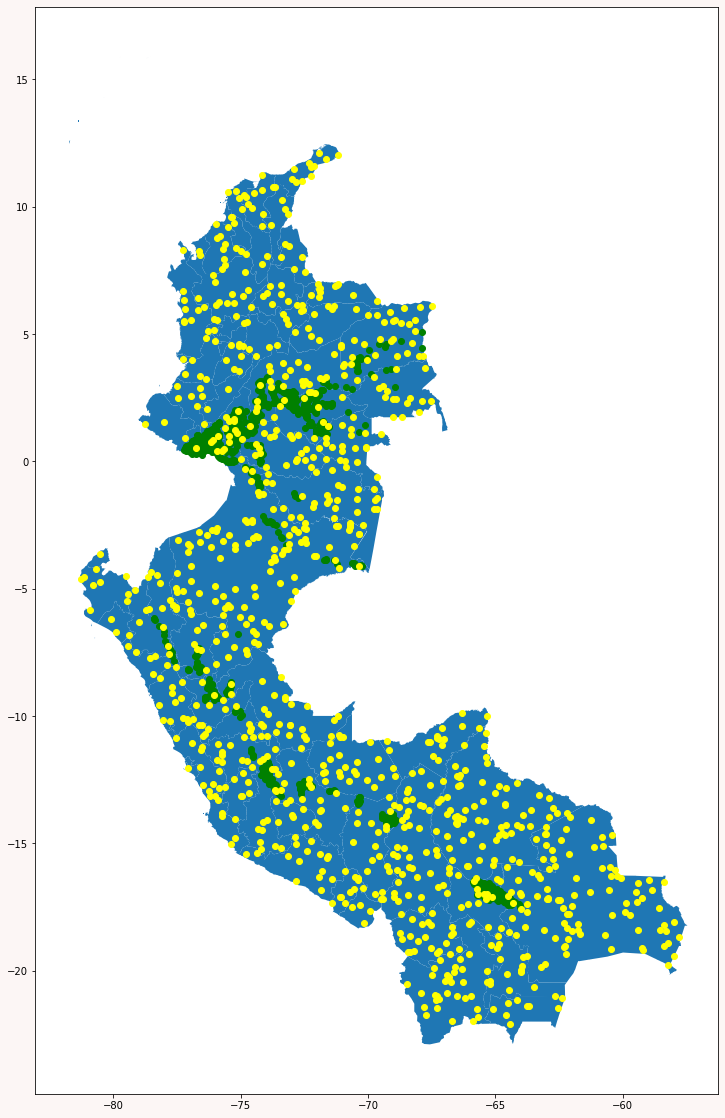

In [33]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20) 
region['geometry'].plot(ax=ax)

coca_def_1['geometry'].plot(ax=ax,color='green')
no_coca_def_1['geometry'].plot(ax=ax,color='yellow')




In [36]:
coca_def_1.shape

(1000, 11)

In [39]:
coca_def_1=coca_def_1[['geometry','coca']]

In [40]:
no_coca_def_1=no_coca_def_1[['geometry']]
no_coca_def_1['coca']=0

In [41]:
no_coca_def_1.head()

,geometry,coca
0,POINT (-70.39826 -16.45290),0
1,POINT (-76.02304 -13.14259),0
2,POINT (-73.85084 0.95771),0
3,POINT (-65.51119 -12.58489),0
4,POINT (-75.51402 -5.64505),0


In [42]:
final_data_points=coca_def_1.append(no_coca_def_1).reset_index(drop=True)

/var/folders/_j/_cg09b3s237bgswq1831fkl00000gn/T/ipykernel_62912/3779991811.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data_points=coca_def_1.append(no_coca_def_1).reset_index(drop=True)


In [46]:
### Save the final datapoints
final_data_points.to_csv('/Users/richardgil/Documents/BGSE/second_term/spatial_data/final_project/Data/data_final.csv')

In [62]:
type(final_data_points)

geopandas.geodataframe.GeoDataFrame

In [63]:
final_data_points.to_file('/Users/richardgil/Documents/BGSE/second_term/spatial_data/final_project/Data/data_final.shp')

/Users/richardgil/Documents/BGSE/second_term/spatial_data/venv_spatial_3/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [97]:
def coord(text):
    x = text.split(" ")[1][1:]
    y = text.split(" ")[2][:len(text.split(" ")[2])-1]
    
    x = float(x)
    y = float(y)
    
    
    
    side = 0.1
    
    
    square = Polygon([(x-side/2, y-side/2), (x+side/2, y-side/2), (x+side/2, y+side/2), (x-side/2, y+side/2)])

    g = str(square)
    
    return g

In [94]:
text=str(final_data_points['geometry'][0])
x = text.split(" ")[1][1:]
y = text.split(" ")[2][:len(text.split(" ")[2])-1]

x = float(x)
y = float(y)

side = 0.1
    
    
square = Polygon([(x-side/2, y-side/2), (x+side/2, y-side/2), (x+side/2, y+side/2), (x-side/2, y+side/2)])

g = str(square)

In [98]:
### Create polygons around the coca point to download the image in the polydon with the cultive on the center
final_data_points['geometry_2']=[coord(str(i)) for i in final_data_points['geometry']]

In [99]:
final_data_points.head()

,geometry,coca,geometry_2
0,POINT (-64.37020 -17.41990),1,"POLYGON ((-64.4202 -17.4699, -64.3202 -17.4699..."
1,POINT (-71.73550 -3.87500),1,"POLYGON ((-71.7855 -3.925, -71.6855 -3.925, -7..."
2,POINT (-73.96300 -12.49770),1,"POLYGON ((-74.01299999999999 -12.5477, -73.913..."
3,POINT (-68.96900 -14.18640),1,POLYGON ((-69.01899999999999 -14.2364000000000...
4,POINT (-64.62170 -17.09650),1,"POLYGON ((-64.6717 -17.1465, -64.5717 -17.1465..."


In [101]:
products = api.query(final_data_points['geometry'][0],
                     date = ('20190601', '20190626'),
                     platformname = 'Sentinel-1',
                     #processinglevel = 'Level-2A',
                     #cloudcoverpercentage = (0,10)
                    )

In [102]:
products_gdf = api.to_geodataframe(products)


In [103]:
products_gdf.head()

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,format,productclass,polarisationmode,acquisitiontype,status,size,identifier,uuid,productconsolidation,geometry
b2d48736-85e2-4a65-8772-020b6a14841a,S1B_IW_SLC__1SDV_20190617T095041_20190617T0951...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-17T09:50:41.482Z, Instrument: SA...",false,2019-06-17 09:50:41.482,2019-06-17 09:51:09.413,2019-06-17 14:55:12.755,129020,...,SAFE,S,VV VH,NOMINAL,ARCHIVED,8.46 GB,S1B_IW_SLC__1SDV_20190617T095041_20190617T0951...,b2d48736-85e2-4a65-8772-020b6a14841a,NaN,"MULTIPOLYGON (((-63.87602 -18.20575, -63.47150..."
95c12d6b-08b9-4736-aa45-48e6f53ada30,S1B_IW_GRDH_1SDV_20190617T095042_20190617T0951...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-17T09:50:42.88Z, Instrument: SAR...",false,2019-06-17 09:50:42.880,2019-06-17 09:51:07.878,2019-06-17 14:25:26.891,129020,...,SAFE,S,VV VH,NOMINAL,ARCHIVED,1.73 GB,S1B_IW_GRDH_1SDV_20190617T095042_20190617T0951...,95c12d6b-08b9-4736-aa45-48e6f53ada30,NaN,"MULTIPOLYGON (((-63.87883 -18.10732, -63.49107..."
95bff302-9abf-416c-8199-b84a7068974d,S1B_IW_RAW__0SDV_20190617T095039_20190617T0951...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-17T09:50:39.179Z, Instrument: SA...",false,2019-06-17 09:50:39.179,2019-06-17 09:51:11.579,2019-06-17 13:12:25.066,129020,...,SAFE,S,VH VV,NOMINAL,ARCHIVED,1.61 GB,S1B_IW_RAW__0SDV_20190617T095039_20190617T0951...,95bff302-9abf-416c-8199-b84a7068974d,SLICE,"MULTIPOLYGON (((-63.91440 -18.54070, -63.43180..."
b6962ccf-bd1b-4688-a83c-8e594b533c32,S1B_IW_SLC__1SDV_20190605T095040_20190605T0951...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-05T09:50:40.729Z, Instrument: SA...",false,2019-06-05 09:50:40.729,2019-06-05 09:51:08.664,2019-06-05 13:29:22.454,127690,...,SAFE,S,VV VH,NOMINAL,ARCHIVED,8.46 GB,S1B_IW_SLC__1SDV_20190605T095040_20190605T0951...,b6962ccf-bd1b-4688-a83c-8e594b533c32,NaN,"MULTIPOLYGON (((-63.87595 -18.20574, -63.47135..."
1c77cec0-3b9e-4438-8403-53a53366e316,S1B_IW_GRDH_1SDV_20190605T095042_20190605T0951...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-05T09:50:42.129Z, Instrument: SA...",false,2019-06-05 09:50:42.129,2019-06-05 09:51:07.127,2019-06-05 13:04:07.645,127690,...,SAFE,S,VV VH,NOMINAL,ARCHIVED,1.73 GB,S1B_IW_GRDH_1SDV_20190605T095042_20190605T0951...,1c77cec0-3b9e-4438-8403-53a53366e316,NaN,"MULTIPOLYGON (((-63.87873 -18.10720, -63.49094..."
